**Correlation between Global Energy Change and the Global Inflation over the past 50 years by country**

In [120]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import sys
from pathlib import Path
import os

data_folder = "../Data"


**Pandafying the csv dataset specific to the Energy Consumer Price Inflation Series Name**


In [121]:
consumer_df = pd.read_csv('Resources/GlobalDatasetofInflation.csv', encoding='ISO-8859-1')
consumer_df.head()

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2019,2020,2021,2022,Note,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,4.26,1.22,0.74,6.04,Annual average inflation,NaN,NaN,NaN,NaN,NaN
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,...,2.30,5.44,5.06,NaN,Annual average inflation,NaN,NaN,NaN,NaN,NaN
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,7.97,5.78,15.80,15.67,27.42,...,17.08,21.02,23.85,21.35,Annual average inflation,NaN,NaN,NaN,NaN,NaN
3,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,1.41,1.62,2.04,6.73,Annual average inflation,NaN,NaN,NaN,NaN,NaN
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,21.98,21.98,21.98,21.98,21.98,...,-1.93,-2.08,0.18,5.22,Annual average inflation,NaN,NaN,NaN,NaN,NaN


In [122]:
#Checking for the unique series names for ours: 'Energy Consumer Price Inflation'
consumer_df['Series Name'].unique()

array(['Headline Consumer Price Inflation',
       'Energy Consumer Price Inflation', 'Food Consumer Price Inflation',
       'Official Core Consumer Price Inflation',
       'Producer Price Inflation'], dtype=object)

In [123]:
#Main DataFrame we will be working off of, will use for comparison
energy_df = consumer_df[consumer_df['Series Name'] == 'Energy Consumer Price Inflation']
fixed_energy_df = energy_df[energy_df['Country'] != 'Venezuela, RB']
fixed_energy_df

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2019,2020,2021,2022,Note,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
203,ABW,314.0,Aruba,Inflation,Energy Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,1.230,-1.28,1.26,5.38,Energy (estimated),NaN,NaN,NaN,NaN,NaN
204,AFG,512.0,Afghanistan,Inflation,Energy Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,-2.490,NaN,NaN,NaN,Energy,NaN,NaN,NaN,NaN,NaN
205,ALB,914.0,Albania,Inflation,Energy Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,0.690,1.42,2.70,15.73,"Housing, Water, Electricity, Gas & Other Fuel",NaN,NaN,NaN,NaN,NaN
206,ARE,466.0,United Arab Emirates,Inflation,Energy Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,-5.200,-3.67,-3.65,NaN,Energy,NaN,NaN,NaN,NaN,NaN
207,ARG,213.0,Argentina,Inflation,Energy Consumer Price Inflation,NaN,25.9,6.7,39.9,9.4,...,49.280,19.95,26.23,45.89,"Housing, Water, Electricity, Gas & Other Fuel",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,ZAF,199.0,South Africa,Inflation,Energy Consumer Price Inflation,NaN,3.2,7.5,10.5,7.9,...,5.210,3.74,14.31,24.37,"Housing, Water, Electricity, Gas & Other Fuel",NaN,NaN,NaN,NaN,NaN
371,ZMB,754.0,Zambia,Inflation,Energy Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,5.690,18.82,18.48,12.81,"Housing, Water, Electricity, Gas & Other Fuel",NaN,NaN,NaN,NaN,NaN
372,ZWE,698.0,Zimbabwe,Inflation,Energy Consumer Price Inflation,1.1,-0.4,-0.6,-0.7,0.3,...,90.810,306.43,69.82,49.07,"Housing, Water, Electricity, Gas & Other Fuel",NaN,NaN,NaN,NaN,NaN
373,VGB,284.0,British Virgin Islands,Inflation,Energy Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,-0.100,-1.00,0.90,NaN,Housing & Utilities,Additional countries from the previous update,NaN,NaN,NaN,NaN


**Cleaning the Filtered Dataset**

In [124]:
#Checking for null values
print(fixed_energy_df.isnull().sum())

#Replace NaN with 0
fixed_energy_df = fixed_energy_df.fillna(value=0)

Country Code          0
IMF Country Code      1
Country               0
Indicator Type        0
Series Name           0
                   ... 
Unnamed: 59         169
Unnamed: 60         171
Unnamed: 61         171
Unnamed: 62         171
Unnamed: 63         171
Length: 64, dtype: int64


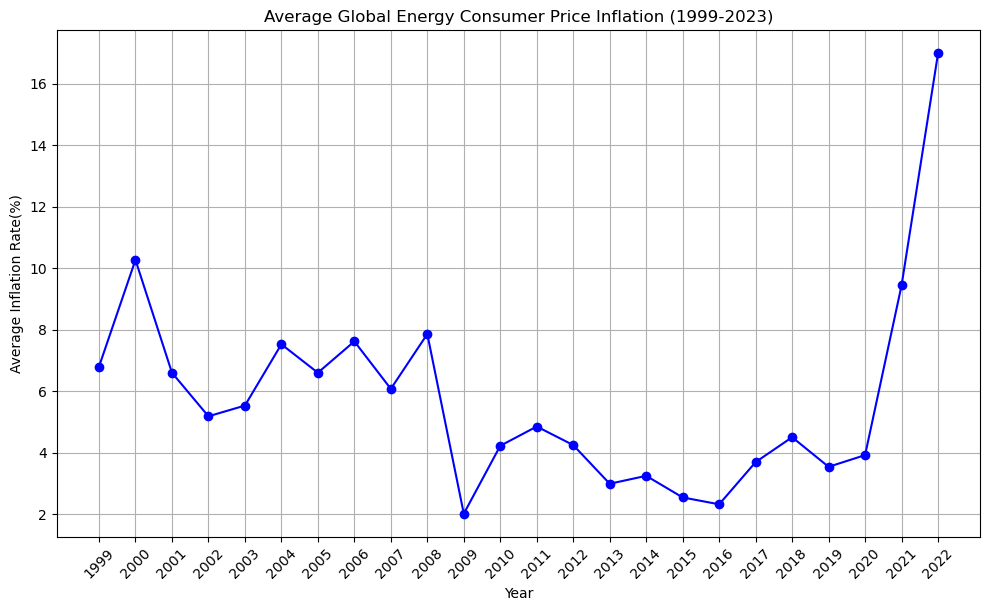

In [125]:
# Selecting years as columns for trend plotting (1999 - 2023)
year_columns = [col for col in fixed_energy_df.columns if col.isdigit() and 1999 <= int(col) <= 2023]

# Calculate the mean inflation for each year across all countries to visualize a global trend
mean_values = fixed_energy_df[year_columns].mean(axis=0, skipna=True)

# Plotting the global average food inflation trend over time
plt.figure(figsize=(10, 6))
plt.plot(mean_values.index, mean_values.values, marker='o', linestyle='-', color='b')
plt.title('Average Global Energy Consumer Price Inflation (1999-2023)')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate(%)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [126]:
# Define a threshold for spikes (e.g., mean + 1.5 * std)
threshold = mean_values.mean() + 1.5 * mean_values.std()

# Extract years and inflation rates where the mean exceeds the threshold
spike_years = mean_values[mean_values > threshold]

# Create a new dataframe with spikes
spike_df = pd.DataFrame({
    'Year': spike_years.index, 
    'Inflation Rate': spike_years.values
    })

# Display the spike dataframe
spike_df

,Year,Inflation Rate
0,2022,16.995965


In [127]:
# Summary Statistics for Each year
yearly_stats = fixed_energy_df[year_columns].describe().T  # Transpose for better readability
yearly_stats

,count,mean,std,min,25%,50%,75%,max
1999,171.0,6.798596,15.039685,-9.10,0.000,1.50,6.200,82.60
2000,171.0,10.274620,35.213331,-10.30,0.000,3.50,8.850,422.70
2001,171.0,6.604678,16.949699,-27.40,0.000,2.45,7.445,169.20
2002,171.0,5.185322,12.717244,-13.78,0.000,1.90,5.940,132.20
2003,171.0,5.534444,12.589465,-47.20,0.000,3.00,6.495,119.90
2004,171.0,7.528947,42.706496,-10.64,0.000,3.00,6.900,557.50
2005,171.0,6.603099,10.746416,-2.37,0.165,4.27,8.620,99.10
2006,171.0,7.623509,15.281933,-2.30,1.520,4.89,9.915,186.00
2007,171.0,6.078596,11.218747,-5.20,0.000,3.41,7.110,99.60
2008,171.0,7.862690,8.953134,-21.40,2.175,6.30,11.795,63.24


In [128]:
# Country-Wise Summary Statistics
country_stats = fixed_energy_df[year_columns].agg(['mean', 'std'], axis=1)

# Add country names
country_stats['Country'] = fixed_energy_df['Country']
country_stats

,mean,std,Country
203,2.237917,5.027132,Aruba
204,2.488750,5.125416,Afghanistan
205,6.109583,7.595671,Albania
206,0.138333,3.148346,United Arab Emirates
207,8.733750,17.078173,Argentina
...,...,...,...
370,6.623750,5.862561,South Africa
371,10.880833,9.102167,Zambia
372,23.113333,64.966254,Zimbabwe
373,0.208333,0.697771,British Virgin Islands


In [129]:
# Year with the highest average inflation
highest_avg_year = mean_values.idxmax()
highest_avg_value = mean_values.max()
print(f"The year with the highest average inflation is {highest_avg_year} with a value of {highest_avg_value:.2f}.")

The year with the highest average inflation is 2022 with a value of 17.00.


In [130]:
# Find the maximum and minimum inflation rates for each country
country_max_inflation = fixed_energy_df[year_columns].max(axis=1)
country_min_inflation = fixed_energy_df[year_columns].min(axis=1)

# Add country names
max_inflation_country = fixed_energy_df.loc[country_max_inflation.idxmax(), 'Country']
min_inflation_country = fixed_energy_df.loc[country_min_inflation.idxmin(), 'Country']

print(f"The country with the highest inflation rate is {max_inflation_country} with {country_max_inflation.max():.2f}.")
print(f"The country with the lowest inflation rate is {min_inflation_country} with {country_min_inflation.min():.2f}.")

The country with the highest inflation rate is Iraq with 557.50.
The country with the lowest inflation rate is Iraq with -47.20.


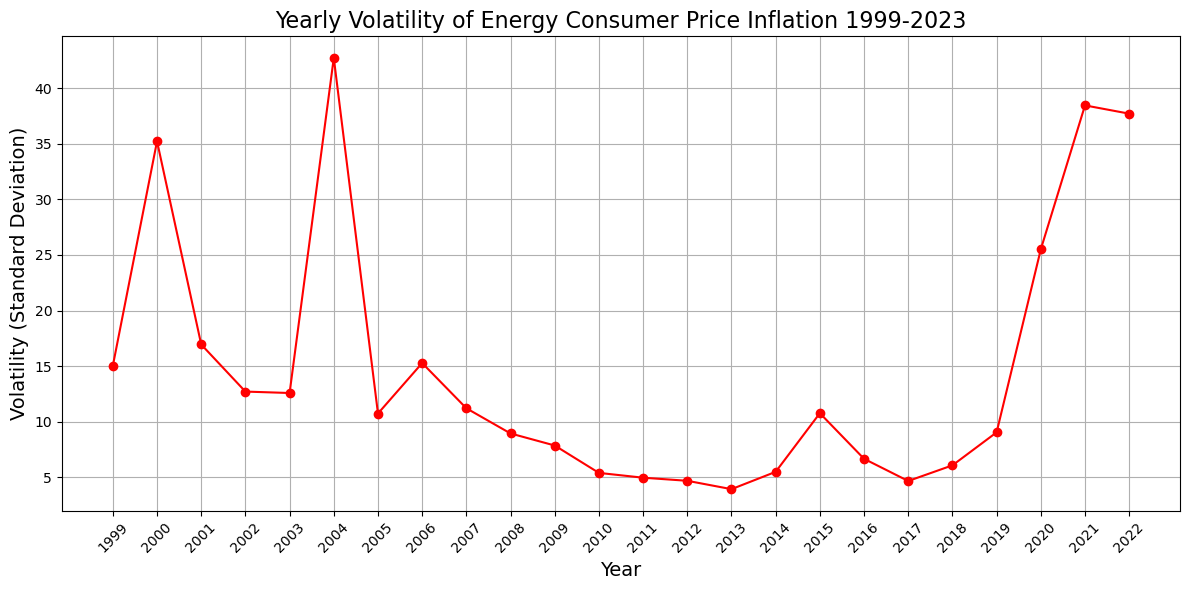

In [131]:
# Yearly volatility (standard deviation of inflation across countries)
yearly_volatility = fixed_energy_df[year_columns].std(axis=0)

# Plot the volatility trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_volatility.index, yearly_volatility.values, marker='o', linestyle='-', color='r')
plt.title('Yearly Volatility of Energy Consumer Price Inflation 1999-2023', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Volatility (Standard Deviation)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/9y/xrbss4p531q5pb18ryzt1jpr0000gn/T/ipykernel_6985/18509124.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Volatility'] = filtered_df[year_columns].std(axis=1)


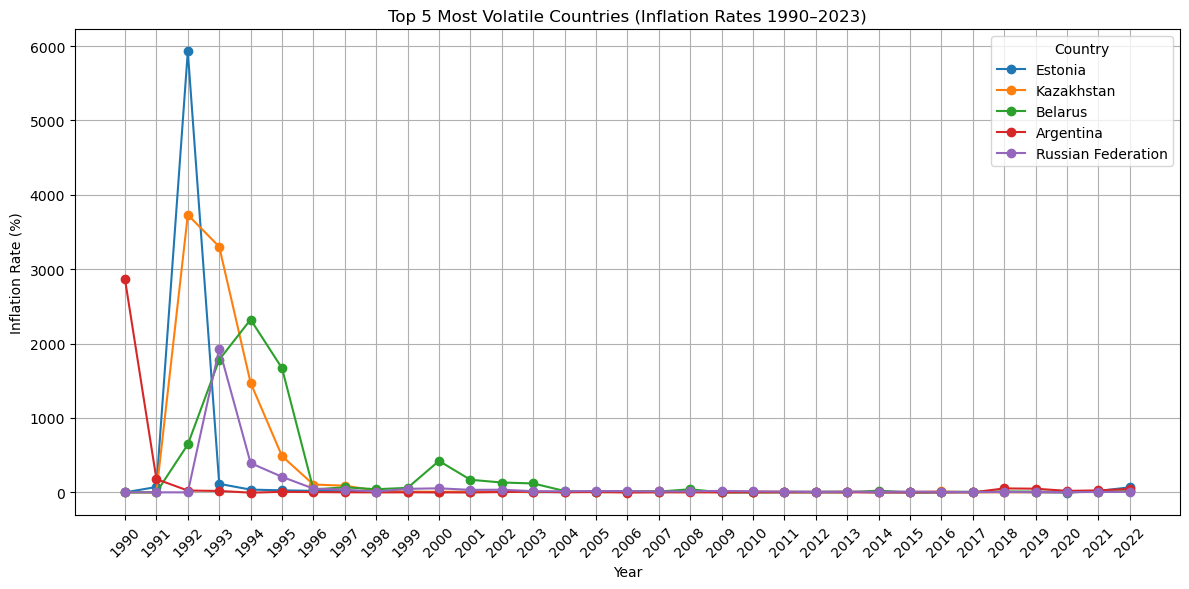

In [132]:
# Step 1: Identify the year columns (1990–2023)
year_columns = [col for col in fixed_energy_df.columns if col.isdigit() and 1990 <= int(col) <= 2023]

# Step 2: Filter the DataFrame to keep only country and year columns
filtered_df = fixed_energy_df[['Country'] + year_columns]

# Step 3: Calculate volatility (standard deviation) for each country across the years
filtered_df['Volatility'] = filtered_df[year_columns].std(axis=1)

# Step 4: Identify the top 5 most volatile countries
top_5_countries = filtered_df.nlargest(5, 'Volatility')['Country']

# Step 5: Filter the DataFrame for the top 5 most volatile countries
top_5_df = filtered_df[filtered_df['Country'].isin(top_5_countries)]

# Step 6: Plot the inflation rates for the top 5 countries
plt.figure(figsize=(12, 6))

for country in top_5_countries:
    country_data = top_5_df[top_5_df['Country'] == country]
    plt.plot(year_columns, country_data.iloc[0][year_columns], label=country, marker='o')

# Customize the plot
plt.title('Top 5 Most Volatile Countries (Inflation Rates 1990–2023)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()